In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

connection = sqlite3.connect('students_grades.db10')

In [2]:
cursor = connection.cursor()

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT, 
    last_name TEXT
    )
''')

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER, 
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
    )
''')

cursor.close()

In [5]:
cursor = connection.cursor()

students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

cursor.executemany(''' 
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

connection.commit()

grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 90),
    (8, 3, 'English', 100),
    (9, 3, 'History', 95),
    (10, 4, 'Math', 85),
    (11, 4, 'English', 91),
    (12, 4, 'History', 75),
    (13, 5, 'Math', 100),
    (14, 5, 'English', 80),
    (15, 5, 'History', 92),
]

cursor.executemany(''' 
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

connection.commit()

In [6]:
#Retrieve all students' names and their grades

cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("All student's name and grades")
for row in joined_data:
    print(row)

All student's name and grades
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 90)
('Carol', 'White', 100)
('Carol', 'White', 95)
('David', 'Brown', 85)
('David', 'Brown', 91)
('David', 'Brown', 75)
('Eve', 'Davis', 100)
('Eve', 'Davis', 80)
('Eve', 'Davis', 92)


In [7]:
#Find the average grade for each student

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) 
FROM students 
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name;
''')

student_avg_grade = cursor.fetchall()

print("Student's name and average grade")
for row in student_avg_grade:
    print(row)

Student's name and average grade
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 95.0)
('David', 'Brown', 83.66666666666667)
('Eve', 'Davis', 90.66666666666667)


In [8]:
#Find student with highest average grade

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students 
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
ORDER BY average_grade DESC
''')

highest_avg_grade = cursor.fetchone()

print(f"Student with highest average grade: {highest_avg_grade[0]}")

Student with highest average grade: Carol


In [9]:
#Find the average grade for the Math subject

cursor.execute('''
SELECT AVG(grade) FROM grades 
WHERE subject = 'Math';
''')

average_math_grade = cursor.fetchone()

print(f"Average Math Grade: {average_math_grade[0]}")

Average Math Grade: 90.4


In [10]:
#List all students who scored above 90 in any subject

cursor.execute('''
SELECT DISTINCT first_name, last_name FROM students 
JOIN grades on students.student_id = grades.student_id
WHERE grade>90;
''')

students_above_90 = cursor.fetchall()

print("Students with grades above 90")
for row in students_above_90:
    print(row)

Students with grades above 90
('Alice', 'Johnson')
('Carol', 'White')
('David', 'Brown')
('Eve', 'Davis')


In [11]:
#load students table into dataframes 

students_df = pd.read_sql_query('SELECT * FROM students', connection)

students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [12]:
#load grades table into dataframes 

grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [13]:
#use join queries to combine data from both tables into a single dataframe that include student's name, subject, and grade

joinquery0 = ('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

combined_df = pd.read_sql_query(joinquery0,connection)

combined_df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


In [14]:
#plot average grades for each student

joinquery1 = ('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

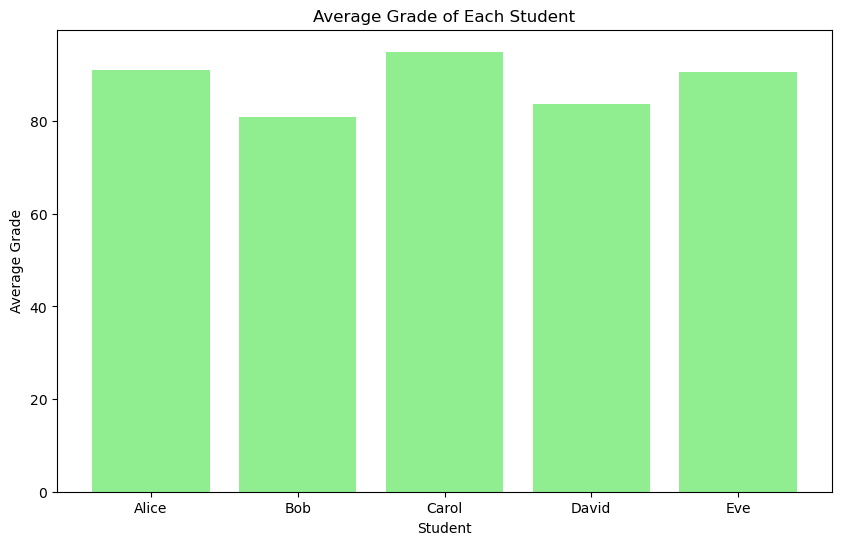

In [15]:
students_avg_grade_df = pd.read_sql_query(joinquery1,connection)
plt.figure(figsize=(10,6))
plt.bar(students_avg_grade_df['first_name'], students_avg_grade_df['average_grade'], color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade of Each Student')
plt.show()

In [16]:
#create bar chart showing average grade for each subject

joinquery2 = ('''
SELECT grades.subject, AVG(grades.grade) AS average_sub_grade
FROM grades
GROUP BY grades.subject
''')

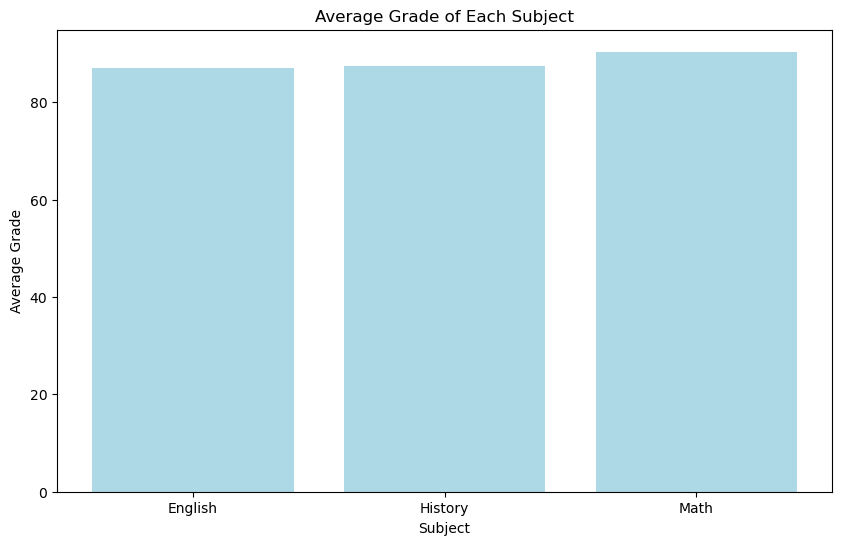

In [17]:
subjects_avg_grade_df = pd.read_sql_query(joinquery2,connection)
plt.figure(figsize=(10,6))
plt.bar(subjects_avg_grade_df['subject'], subjects_avg_grade_df['average_sub_grade'], color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade of Each Subject')
plt.show()

In [18]:
#implement a query that finds the student with highest grade in each subject

cursor.execute('''
SELECT grades.subject, students.first_name, MAX(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY subject
ORDER BY grade DESC
''')

sorted_grades = cursor.fetchall()

print("Student with highest grade in each subject")
for row in sorted_grades:
    print(f"{row[0]}: {row[1]}")

Student with highest grade in each subject
Math: Eve
English: Carol
History: Carol


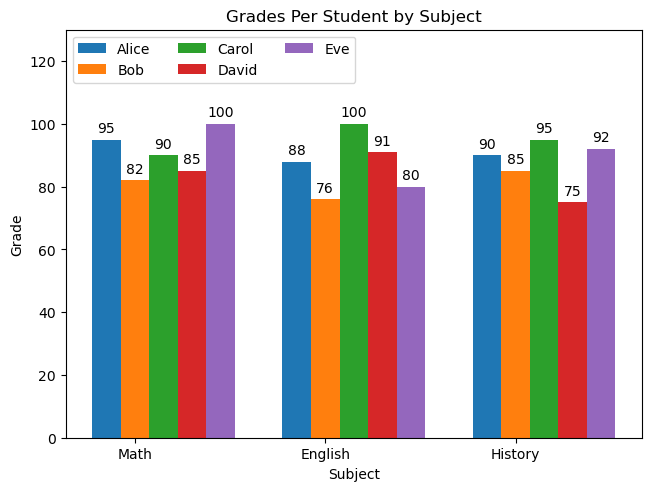

In [19]:
#visualize results using a grouped bar graph 
#Source - https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

subjects = combined_df['subject'].unique()
names = combined_df['first_name'].unique()

x = np.arange(len(subjects))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for name in names:
    current_grades = []
    for subject in subjects:
        grade = combined_df[(combined_df['first_name'] == name) & (combined_df['subject'] == subject)]['grade'].values[0]
        current_grades.append(grade)
    offset = width * multiplier
    rects = ax.bar(offset + x, current_grades, width, label=name)
    ax.bar_label(rects, padding=3)
    
    multiplier += 1

ax.set_ylabel('Grade')
ax.set_title('Grades Per Student by Subject')
ax.set_xlabel('Subject')
ax.set_xticks(x + width, subjects)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 130)

plt.show()